In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
#IMPORT DATASETS

In [38]:
mapping = pd.read_csv("dataset/dataset/linkedin_to_isic_rev_4_industry_mapping_0.csv")
emp_growth = pd.read_excel("dataset/dataset/public_use-industry-employment-growth.xlsx", sheet_name = "Growth from Industry Transition")
skills_needs = pd.read_excel("dataset/dataset/public_use-industry-skills-needs.xlsx", sheet_name = "Industry Skills Needs")
skill_penetr = pd.read_excel("dataset/dataset/public_use-skill-penetration.xlsx", sheet_name = "Skill Penetration")
talent_migra = pd.read_excel("dataset/dataset/public_use-talent-migration.xlsx", sheet_name = "Skill Migration")

In [153]:
#Get insights on datasets

In [43]:
mapping.head()

,isic_section,isic_section_name,isic_division,isic_division_name,industry_sk,industry_name,Industry_group_sk,Industry_group_name
0,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",63,farming,1,Agriculture
1,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",64,ranching,1,Agriculture
2,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",65,dairy,1,Agriculture
3,A,A. Agriculture; forestry and fishing,3,Fishing and aquaculture,66,fishery,1,Agriculture
4,B,B. Mining and quarrying,5,Mining of coal and lignite,56,mining & metals,16,Energy and Mining


In [41]:
mapping["isic_section_name"].unique()

array([' A. Agriculture; forestry and fishing',
       ' B. Mining and quarrying', ' C. Manufacturing',
       ' D. Electricity; gas, steam and air conditioning supply',
       ' F. Construction',
       ' G. Wholesale and retail trade; repair of motor vehicles and motorcycles',
       ' H. Transportation and storage',
       ' I. Accommodation and food service activities',
       ' J. Information and communication',
       ' K. Financial and insurance activities',
       ' L. Real estate activities',
       ' M. Professional, scientific and technical activities',
       ' N. Administrative and support service activities',
       ' O. Public administration and defence; compulsory social security',
       ' P. Education', ' Q. Human health and social work activities',
       ' R. Arts, entertainment and recreation',
       ' S. Other service activities', ' X. Not elsewhere classified'],
      dtype=object)

In [154]:
#METHODOLOGY OF THE TEST1

In [42]:
emp_growth.head()

,country_code,country_name,wb_region,wb_income,isic_section_index,isic_section_name,industry_id,industry_name,growth_rate_2015,growth_rate_2016,growth_rate_2017,growth_rate_2018,growth_rate_2019
0,ae,United Arab Emirates,Middle East & North Africa,High income,B,Mining and quarrying,56,Mining & Metals,0.078000,0.058550,0.043402,0.010048,-0.000621
1,ae,United Arab Emirates,Middle East & North Africa,High income,B,Mining and quarrying,57,Oil & Energy,0.033015,0.013479,0.017459,0.018514,0.022606
2,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,15,Pharmaceuticals,0.171367,0.136986,0.090631,0.048148,0.028423
3,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,23,Food Production,0.063351,0.038647,0.022137,0.005990,0.004317
4,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,52,Aviation & Aerospace,0.096607,0.056744,0.028673,0.015048,0.000816


In [155]:
#LIST OF SECTORS

In [48]:
emp_growth["isic_section_name"].unique()

array(['Mining and quarrying', 'Manufacturing',
       'Information and communication',
       'Financial and insurance activities',
       'Professional scientific and technical activities',
       'Arts, entertainment and recreation '], dtype=object)

In [156]:
#PREPROCESSING

In [111]:
IC_growth = emp_growth[emp_growth["isic_section_name"] == 'Information and communication']
IC_growth = IC_growth.drop(['isic_section_name', 'isic_section_index', 'country_code', 'wb_region', 'industry_id'], axis = 1)
IC_growth.rename(columns = {'growth_rate_2015':'2015', 'growth_rate_2016':'2016', 'growth_rate_2017':'2017', 'growth_rate_2018':'2018', 'growth_rate_2019':'2019'}, inplace = True)
IC_growth

,country_name,wb_income,industry_name,2015,2016,2017,2018,2019
18,United Arab Emirates,High income,Computer Hardware,-0.021384,0.014925,-0.008054,-0.008065,-0.001325
19,United Arab Emirates,High income,Computer Software,0.215213,0.180743,0.134931,0.090398,0.035764
20,United Arab Emirates,High income,Computer Networking,0.194149,0.057179,0.043081,0.035762,0.054974
21,United Arab Emirates,High income,Internet,0.349427,0.260620,0.176925,0.132809,0.108835
22,United Arab Emirates,High income,Semiconductors,0.070822,0.041401,0.006734,0.010067,-0.009868
...,...,...,...,...,...,...,...,...
7306,Zimbabwe,Low income,Broadcast Media,-0.041812,-0.042553,-0.021201,-0.017301,-0.030717
7307,Zimbabwe,Low income,Newspapers,0.000000,0.008969,0.018018,-0.008850,-0.008772
7308,Zimbabwe,Low income,Publishing,-0.021277,-0.010870,0.000000,0.000000,-0.021053
7309,Zimbabwe,Low income,Information Technology & Services,-0.065532,-0.052117,-0.042263,-0.027232,-0.001886


In [112]:
IC_growth.dtypes

country_name      object
wb_income         object
industry_name     object
2015             float64
2016             float64
2017             float64
2018             float64
2019             float64
dtype: object

In [157]:
#IDENTIFY ALL THE INDUSTRY IN THE SECTOR

In [113]:
IC_growth["industry_name"].unique()

array(['Computer Hardware', 'Computer Software', 'Computer Networking',
       'Internet', 'Semiconductors', 'Telecommunications',
       'Motion Pictures & Film', 'Broadcast Media', 'Newspapers',
       'Publishing', 'Information Technology & Services',
       'Writing & Editing', 'Computer Games', 'Online Media',
       'Computer & Network Security', 'Wireless', 'Media Production'],
      dtype=object)

In [158]:
#IDENTIFY ALL THE COUNTRY INVOLVE

In [114]:
IC_growth["country_name"].unique()

array(['United Arab Emirates', 'Afghanistan', 'Albania', 'Armenia',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Azerbaijan',
       'Bosnia and Herzegovina', 'Bangladesh', 'Belgium', 'Bulgaria',
       'Bahrain', 'Benin', 'Bolivia', 'Brazil', 'Botswana', 'Belarus',
       'Canada', 'Congo, Dem. Rep.', 'Switzerland', "Cote d'Ivoire",
       'Chile', 'Cameroon', 'China', 'Colombia', 'Costa Rica', 'Cuba',
       'Cyprus', 'Czech Republic', 'Germany', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia',
       'Egypt, Arab Rep.', 'Spain', 'Ethiopia', 'Finland', 'France',
       'United Kingdom', 'Georgia', 'Ghana', 'Greece', 'Guatemala',
       'Hong Kong SAR, China', 'Honduras', 'Croatia', 'Hungary',
       'Indonesia', 'Ireland', 'Israel', 'India', 'Iraq',
       'Iran, Islamic Rep.', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Cambodia', 'Korea, Rep.', 'Kuwait', 'Kazakhstan',
       'Lebanon', 'Sri Lanka', 'Lithuania', 'Luxembourg', 'Latvia',
 

In [159]:
#GROUP BY INDUSTRY TO KNOW THE GROWTH OF EACH INDUSTRY

In [115]:
group_IN = IC_growth.groupby('industry_name')
group_IN_mean = group_IN.mean()
group_IN_mean

,2015,2016,2017,2018,2019
industry_name,,,,,
Broadcast Media,-0.010090,-0.009261,-0.009125,-0.008812,-0.009866
Computer & Network Security,0.019937,0.028925,0.019326,0.016785,0.019921
Computer Games,0.015301,0.006075,0.004203,-0.001938,-0.002126
Computer Hardware,-0.012907,-0.009779,-0.004438,-0.001501,-0.005814
Computer Networking,0.002800,-0.003906,-0.010566,-0.003387,0.002392
Computer Software,-0.003345,0.001578,-0.001281,0.007822,0.007198
Information Technology & Services,-0.004702,-0.006104,-0.005406,-0.001668,0.001522
Internet,0.023297,0.015906,0.014219,0.009943,0.012292
Media Production,-0.011661,-0.011672,-0.016344,-0.012851,-0.007431


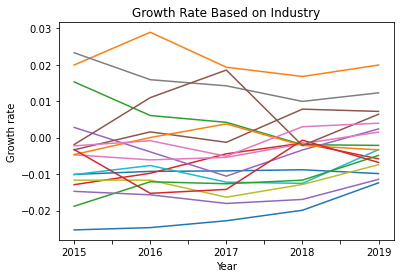

In [137]:
IN_plot = group_IN_mean.transpose().plot()
IN_plot.set_title("Growth Rate Based on Industry")
IN_plot.set_xlabel("Year")
IN_plot.set_ylabel("Growth rate")
IN_plot.get_legend().remove()

Text(0, 0.5, 'Growth rate')

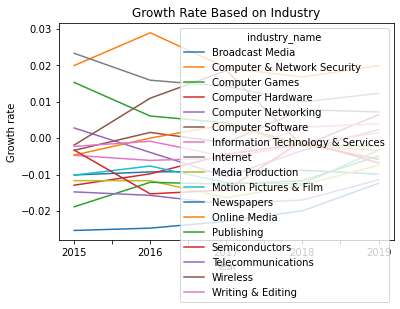

In [140]:
IN_plot = group_IN_mean.transpose().plot()
IN_plot.set_title("Growth Rate Based on Industry")
IN_plot.set_xlabel("Year")
IN_plot.set_ylabel("Growth rate")

In [160]:
#GROUP BY COUNTRY TO KNOW THE GROWTH OF MALAYSIA

In [117]:
group_CN = IC_growth.groupby('country_name')
group_CN.mean().loc['Malaysia']

2015   -0.006965
2016   -0.007751
2017   -0.006076
2018   -0.005385
2019   -0.008428
Name: Malaysia, dtype: float64

Text(0.5, 0, 'Year')

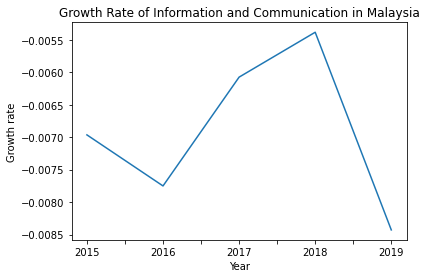

In [124]:
MY_plot = group_CN.mean().loc['Malaysia'].plot()
MY_plot.set_title("Growth Rate of Information and Communication in Malaysia")
MY_plot.set_ylabel("Growth rate")
MY_plot.set_xlabel("Year")

In [162]:
#SELECT ALL ROWS ONLY FOR MALAYSIA AND GROUP BY INDUSTRY

In [141]:
MY_IC_growth = IC_growth[IC_growth['country_name'] == 'Malaysia']
group_IN_MY = MY_IC_growth.groupby('industry_name')
group_IN_MY_mean = group_IN_MY.mean()
group_IN_MY_mean

,2015,2016,2017,2018,2019
industry_name,,,,,
Broadcast Media,-0.020878,-0.017228,-0.034848,-0.035115,-0.039877
Computer & Network Security,-0.022315,-0.006993,-0.023288,-0.004098,0.010512
Computer Games,-0.052257,-0.025063,-0.031941,-0.024814,-0.017073
Computer Hardware,-0.057840,-0.076190,-0.034810,-0.002429,-0.046568
Computer Networking,-0.016611,-0.034884,-0.023649,-0.031879,-0.022109
Computer Software,0.012039,0.006343,-0.001096,-0.002154,0.008376
Information Technology & Services,0.017625,0.012632,0.005314,0.003911,-0.001231
Internet,0.017304,0.001902,-0.003139,0.019814,-0.009736
Media Production,-0.014585,-0.030047,-0.019029,-0.002882,-0.015992


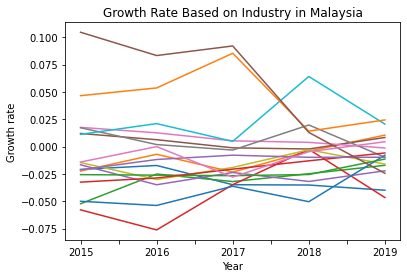

In [150]:
MY_IN_plot = group_IN_MY_mean.transpose().plot()
MY_IN_plot.set_title("Growth Rate Based on Industry in Malaysia")
MY_IN_plot.set_xlabel("Year")
MY_IN_plot.set_ylabel("Growth rate")
MY_IN_plot.get_legend().remove()

Text(0, 0.5, 'Growth rate')

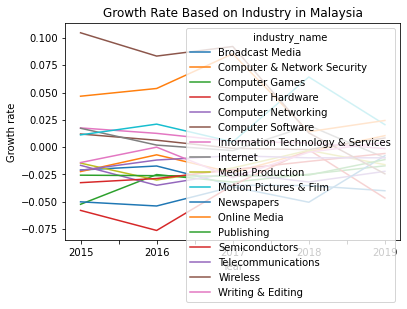

In [151]:
MY_IN_plot = group_IN_MY_mean.transpose().plot()
MY_IN_plot.set_title("Growth Rate Based on Industry in Malaysia")
MY_IN_plot.set_xlabel("Year")
MY_IN_plot.set_ylabel("Growth rate")

In [164]:
#DOING SOME INSIGHT ON OTHER DATASET

In [120]:
skills_needs.head()

,year,isic_section_index,isic_section_name,industry_name,skill_group_category,skill_group_name,skill_group_rank
0,2015,B,Mining and quarrying,Mining & Metals,Specialized Industry Skills,Mining,1
1,2015,B,Mining and quarrying,Mining & Metals,Soft Skills,Negotiation,2
2,2015,B,Mining and quarrying,Mining & Metals,Business Skills,Project Management,3
3,2015,B,Mining and quarrying,Mining & Metals,Business Skills,Business Management,4
4,2015,B,Mining and quarrying,Mining & Metals,Specialized Industry Skills,Earth Science,5


In [86]:
skills_needs["isic_section_name"].unique()

array(['Mining and quarrying', 'Manufacturing',
       'Information and communication',
       'Financial and insurance activities',
       'Professional scientific and technical activities',
       'Arts, entertainment and recreation '], dtype=object)

In [94]:
IC_skills = skills_needs[skills_needs["isic_section_name"] == 'Information and communication']
IC_skills[IC_skills["year"] == 2019]

,year,isic_section_index,isic_section_name,industry_name,skill_group_category,skill_group_name,skill_group_rank
2960,2019,J,Information and communication,Computer Hardware,Tech Skills,Computer Hardware,1
2961,2019,J,Information and communication,Computer Hardware,Tech Skills,Technical Support,2
2962,2019,J,Information and communication,Computer Hardware,Tech Skills,Digital Literacy,3
2963,2019,J,Information and communication,Computer Hardware,Tech Skills,System Administration,4
2964,2019,J,Information and communication,Computer Hardware,Tech Skills,Computer Networking,5
...,...,...,...,...,...,...,...
3115,2019,J,Information and communication,Media Production,Tech Skills,Social Media,6
3116,2019,J,Information and communication,Media Production,Tech Skills,Graphic Design,7
3117,2019,J,Information and communication,Media Production,Soft Skills,Writing,8
3118,2019,J,Information and communication,Media Production,Tech Skills,Animation,9


In [82]:
skill_penetr.head()

,year,skill_group_category,skill_group_name,isic_section_index,isic_section_name,industry_name,skill_group_penetration_rate
0,2015,Business Skills,Accounts Payable,M,Professional scientific and technical activities,Accounting,0.00719
1,2015,Business Skills,Accounts Payable,M,Professional scientific and technical activities,Law Practice,0.00244
2,2015,Business Skills,Accounts Payable,M,Professional scientific and technical activities,Executive Office,0.00222
3,2015,Business Skills,Accounts Payable,C,Manufacturing,Packaging & Containers,0.00132
4,2015,Business Skills,Accounts Payable,B,Mining and quarrying,Oil & Energy,0.00132


In [20]:
mapping.dtypes

isic_section           object
isic_section_name      object
isic_division           int64
isic_division_name     object
industry_sk             int64
industry_name          object
Industry_group_sk       int64
Industry_group_name    object
dtype: object

In [23]:
indexdrop = mapping[mapping['isic_division'] == -9].index
mapping.drop(indexdrop, inplace = True)
mapping

,isic_section,isic_section_name,isic_division,isic_division_name,industry_sk,industry_name,Industry_group_sk,Industry_group_name
0,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",63,farming,1,Agriculture
1,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",64,ranching,1,Agriculture
2,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",65,dairy,1,Agriculture
3,A,A. Agriculture; forestry and fishing,3,Fishing and aquaculture,66,fishery,1,Agriculture
4,B,B. Mining and quarrying,5,Mining of coal and lignite,56,mining & metals,16,Energy and Mining
...,...,...,...,...,...,...,...,...
139,S,S. Other service activities,96,Other personal service activities,88,individual and family services,13,Nonprofit
140,S,S. Other service activities,94,Activities of professional membership organiza...,89,religious institutions,13,Nonprofit
141,S,S. Other service activities,94,Activities of professional membership organiza...,90,civic & social organization,13,Nonprofit
142,S,S. Other service activities,94,Activities of professional membership organiza...,100,non-profit organization management,13,Nonprofit


In [27]:
mapping

,isic_section,isic_section_name,isic_division,isic_division_name,industry_sk,industry_name,Industry_group_sk,Industry_group_name
0,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",63,farming,1,Agriculture
1,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",64,ranching,1,Agriculture
2,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",65,dairy,1,Agriculture
3,A,A. Agriculture; forestry and fishing,3,Fishing and aquaculture,66,fishery,1,Agriculture
4,B,B. Mining and quarrying,5,Mining of coal and lignite,56,mining & metals,16,Energy and Mining
...,...,...,...,...,...,...,...,...
139,S,S. Other service activities,96,Other personal service activities,88,individual and family services,13,Nonprofit
140,S,S. Other service activities,94,Activities of professional membership organiza...,89,religious institutions,13,Nonprofit
141,S,S. Other service activities,94,Activities of professional membership organiza...,90,civic & social organization,13,Nonprofit
142,S,S. Other service activities,94,Activities of professional membership organiza...,100,non-profit organization management,13,Nonprofit
